# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./App/Reacher_20.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
count = 0
while True:
    count += 1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print('Total timesteps: {}'.format(count))

Total score (averaged over agents) this episode: 0.11199999749660491
Total timesteps: 1001


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
# Import the necessary packages
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

#### Train the 20 Agents with DDPG

To amend the `ddpg` code to work for 20 agents instead of 1, here are the modifications I did in `ddpg_agent.py`:

- With each step, each agent adds its experience to a replay buffer shared by all agents (line 61-61).
- At first, the (local) actor and critic networks are updated 20 times in a row (one for each agent), using 20 different samples from the replay buffer as below:
```
def step(self, states, actions, rewards, next_states, dones):
    ...
    # Learn (with each agent), if enough samples are available in memory
    if len(self.memory) > BATCH_SIZE:
        for i in range(self.num_agents):
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)
```
    Then in order to get less aggressive with the number of updates per time step, instead of updating the actor and critic networks __20 times__ at __every timestep__, we amended the code to update the networks __10 times__ after every __20 timesteps__ (line )

In [7]:
def ddpg(agent, n_episodes=1000, print_every=100, num_agents=1):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): episodes interval to print training scores
        num_agents (int): the number of agents
    """
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment and agent
        states = env_info.vector_observations              # get the current state (for each agent)
        scores_i = np.zeros(num_agents)                    # initialize the scores (for each agent) of the current episode

        while True:
            # get experiences (for each agent)
            actions = agent.act(states)                    # select an action (for each agent)
            env_info = env.step(actions)[brain_name]       # send action to the environment
            next_states = env_info.vector_observations     # get the next states (for each agent)
            rewards = env_info.rewards                     # get the rewards (for each agent)
            dones = env_info.local_done                    # get dones (for each agent)
            # store experience & train the agent
            agent.step(states, actions, rewards, next_states, dones, 
                       update_every=20, update_times=10)   
            # update for the next step
            states = next_states                           # roll over state to next time step
            scores_i += rewards                            # update the score
            if np.any(dones):                              # exit loop if episode finished
                break 
        
        # save average of the most recent average scores
        scores_deque.append(np.mean(scores_i))             
        scores.append(np.mean(scores_i))

        # display training progress
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), './Model_Weights/checkpoint_actor_20.pth')
        torch.save(agent.critic_local.state_dict(), './Model_Weights/checkpoint_critic_20.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 32.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            break
            
    return scores

Episode 20	Average Score: 0.68
Episode 40	Average Score: 1.98
Episode 60	Average Score: 4.94
Episode 80	Average Score: 8.33
Episode 100	Average Score: 11.09
Episode 120	Average Score: 17.60
Episode 140	Average Score: 22.37
Episode 160	Average Score: 24.30
Episode 180	Average Score: 30.20
Episode 200	Average Score: 31.74
Episode 220	Average Score: 30.96
Episode 240	Average Score: 31.49
Episode 244	Average Score: 32.04
Environment solved in 244 episodes!	Average Score: 32.04


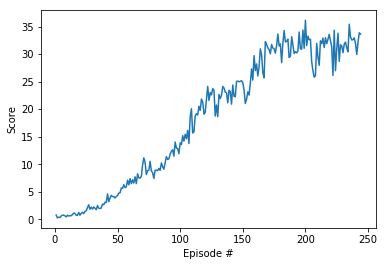

<Figure size 432x288 with 0 Axes>

In [8]:
# initialize agents
agents = Agent(state_size=33, action_size=4, random_seed=2, num_agents=20)

# apply DDPG to train the 20 agents in 'Reacher' environment
scores = ddpg(agents, n_episodes=1000, print_every=20, num_agents=20)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig.savefig('./readme_imgs/ddpg_20.png')

In [9]:
# load the weights from file
agents.actor_local.load_state_dict(torch.load('./Model_Weights/checkpoint_actor_20.pth'))
agents.critic_local.load_state_dict(torch.load('./Model_Weights/checkpoint_critic_20.pth'))

# test the trained policy of Actor
scores_test = []

for i_episode in range(1, 101):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment and agent
    states = env_info.vector_observations              # get the current state (for each agent)
    scores_i = np.zeros(20)                            # initialize the scores (for each agent) of the current episode
    
    while True:
        # get experience tuple (S, A, R, S')
        actions = agents.act(states)                    # select an action (for each agent)
        env_info = env.step(actions)[brain_name]       # send action to the environment
        next_states = env_info.vector_observations     # get the next states (for each agent)
        rewards = env_info.rewards                     # get the rewards (for each agent)
        dones = env_info.local_done                    # get dones (for each agent)
        # update for the next step
        states = next_states                           # roll over state to next time step
        scores_i += rewards                            # update the score
        if np.any(dones):                              # exit loop if episode finished
            break 
    
    # save average of the most recent scores            
    scores_test.append(np.mean(scores_i))

print('\rAverage Score: {:.2f}'.format(np.mean(scores_test)))

Average Score: 33.42


In [10]:
env.close()